## 9장. 케라스2 응용
실제 문제에 인공지능을 활용할 때 생기는 문제들을 효율적으로 처리하는 케라스의 응용 기능을 알아봅시다.

### 9.1 이미지 데이터 수 늘리기   
이미지 데이터 수가 적을 때는 케라스의 서브패키지 ImageDataGenerator를 이용하면 다양한 형태로 이미지 수를 늘릴 수 있습니다. 

### 9.1.1 응용 코드
#### 9.1.1.1 응용 코드를 위한 패키지 임포트

In [4]:
#from keras import datasets
#import keras
#from keraspp import aigen
from sklearn import model_selection
from tensorflow.keras import datasets
from tensorflow import keras
assert keras.backend.image_data_format() == 'channels_last'
from keraspp import aigen

#### 9.1.1.2 머쉰 클래스 상속하여 데이터 지정

In [5]:
from keras.preprocessing.image import ImageDataGenerator
from keraspp import aicnn

class Machine_Generator(aicnn.Machine):
    def __init__(self, X, y, nb_classes=2, steps_per_epoch=10, fig=True,
                 gen_param_dict=None):
        super().__init__(X, y, nb_classes=nb_classes, fig=fig)
        self.set_generator(steps_per_epoch=steps_per_epoch,
                           gen_param_dict=gen_param_dict)

    def set_generator(self, steps_per_epoch=10, gen_param_dict=None):
        if gen_param_dict is not None:
            self.generator = ImageDataGenerator(**gen_param_dict)
        else:
            self.generator = ImageDataGenerator()

        print(self.data.X_train.shape)

        self.generator.fit(self.data.X_train, seed=0)
        self.steps_per_epoch = steps_per_epoch

    def fit(self, epochs=10, batch_size=64, verbose=1):
        model = self.model
        data = self.data
        generator = self.generator
        steps_per_epoch = self.steps_per_epoch

        history = model.fit_generator(
            generator.flow(data.X_train, data.Y_train, batch_size=batch_size),
            epochs=epochs, steps_per_epoch=steps_per_epoch,
            validation_data=(data.X_test, data.Y_test))

        return history

In [6]:
class Machine(Machine_Generator):
    def __init__(self):
        (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
        _, X, _, y = model_selection.train_test_split(x_train, y_train, test_size=0.02)
        X = X.astype(float)

        gen_param_dict = {'rotation_range': 10}

        super().__init__(X, y, nb_classes=10, gen_param_dict=gen_param_dict)

(800, 32, 32, 3) (800, 1)
X_train shape: (800, 32, 32, 3)
800 train samples
200 test samples
data.input_shape (32, 32, 3)
(800, 32, 32, 3)
Instructions for updating:
Please use Model.fit, which supports generators.


2021-11-05 16:45:32.449416: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-11-05 16:45:32.779824: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-11-05 16:45:32.779889: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (SJKIM-Home): /proc/driver/nvidia/version does not exist
2021-11-05 16:45:32.781626: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2021-11-05 16:45:32.794924: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 3599995000 Hz
2021-11-05 16:45:32.795875: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55688bb6c470 initialized for platform Host (this does not guarantee that XLA will be used). Devi

Epoch 1/100
10/10 [==============================] - 2s 200ms/step - loss: 2.3108 - accuracy: 0.1022 - val_loss: 2.3167 - val_accuracy: 0.1000
Epoch 2/100
10/10 [==============================] - 2s 176ms/step - loss: 2.3155 - accuracy: 0.0895 - val_loss: 2.3158 - val_accuracy: 0.1000
Epoch 3/100
10/10 [==============================] - 2s 175ms/step - loss: 2.3122 - accuracy: 0.1075 - val_loss: 2.3154 - val_accuracy: 0.0950
Epoch 4/100
10/10 [==============================] - 2s 184ms/step - loss: 2.3183 - accuracy: 0.0938 - val_loss: 2.3145 - val_accuracy: 0.0950
Epoch 5/100
10/10 [==============================] - 2s 157ms/step - loss: 2.3139 - accuracy: 0.0836 - val_loss: 2.3136 - val_accuracy: 0.1000
Epoch 6/100
10/10 [==============================] - 2s 170ms/step - loss: 2.3036 - accuracy: 0.1199 - val_loss: 2.3129 - val_accuracy: 0.1000
Epoch 7/100
10/10 [==============================] - 1s 145ms/step - loss: 2.3110 - accuracy: 0.0744 - val_loss: 2.3122 - val_accuracy: 0.1000

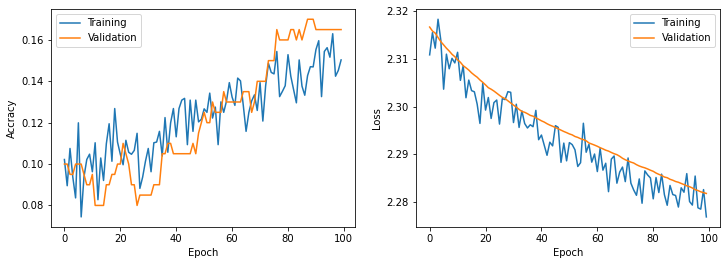

In [7]:
def main():
    m = Machine()
    m.run()

main()

---
### 9.1.3 전체 코드

(800, 32, 32, 3) (800, 1)
X_train shape: (800, 32, 32, 3)
800 train samples
200 test samples
data.input_shape (32, 32, 3)
(800, 32, 32, 3)


/Users/james/anaconda3/envs/keras2/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
10/10 [==============================] - 2s 116ms/step - loss: 2.3287 - accuracy: 0.0717 - val_loss: 2.3000 - val_accuracy: 0.1050
Confusion matrix
[[ 0  0  0  0  3  0  0  0 10  6]
 [ 1  1  0  0  5  2  2  0  8  2]
 [ 0  0  0  0  3  2  1  0  4  3]
 [ 0  0  0  0  4  0  1  0  8 10]
 [ 0  0  0  0  3  1  0  0  4 18]
 [ 0  0  0  0  2  1  0  0  7 12]
 [ 1  0  0  0  7  0  0  0  6 11]
 [ 0  0  0  0  6  0  1  0  4  2]
 [ 0  0  0  0  5  0  0  0 13  4]
 [ 0  0  0  0  4  1  0  0  8  3]]
Test score: 2.3000240325927734
Test accuracy: 0.10499999672174454
Output results are saved in output_16a24288-8a4c-4d85-a849-a94bf4ffc602


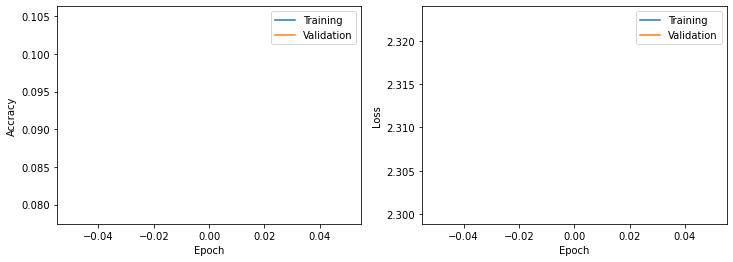

In [5]:
from sklearn import model_selection
from tensorflow.keras import datasets
from tensorflow import keras
assert keras.backend.image_data_format() == 'channels_last'
from keraspp import aigen

class Machine(aigen.Machine_Generator):
    def __init__(self):
        (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
        _, X, _, y = model_selection.train_test_split(x_train, y_train, test_size=0.02)
        X = X.astype(float)

        gen_param_dict = {'rotation_range': 10}

        super().__init__(X, y, nb_classes=10, gen_param_dict=gen_param_dict)


def main():
    m = Machine()
    m.run()


main()